In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df= pd.read_csv('/content/drive/MyDrive/train.csv', header=0)
print(df.shape)
print(df.columns)
print(df.dtypes)

(1117957, 22)
Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')
id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPr

In [5]:
df.drop(columns='id', inplace=True)

In [45]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [6]:
for column in df.columns:
    if column != 'FloodProbability':
        df[column] = df[column].astype('category')

# Display the number of unique values in each categorical column
category_counts = {}
for column in df.columns:
    if column != 'FloodProbability':
        category_counts[column] = df[column].value_counts().sort_index()

# Print the value counts for each categorical column
for column, counts in category_counts.items():
    print(f"Value counts for {column}:")
    print(counts)
    print()

Value counts for MonsoonIntensity:
MonsoonIntensity
0       5431
1      28946
2      86683
3     160574
4     214344
5     220936
6     169080
7     109210
8      65954
9      33515
10     14040
11      5851
12      2062
13       729
14       391
15       169
16        42
Name: count, dtype: int64

Value counts for TopographyDrainage:
TopographyDrainage
0       5541
1      29422
2      90058
3     161989
4     213368
5     221252
6     159003
7     102681
8      72000
9      37544
10     15524
11      6177
12      2199
13       705
14       333
15       106
16        42
17        10
18         3
Name: count, dtype: int64

Value counts for RiverManagement:
RiverManagement
0       5407
1      28872
2      83782
3     160049
4     214079
5     218216
6     167368
7     108538
8      71204
9      36232
10     15170
11      5773
12      2120
13       715
14       297
15        92
16        43
Name: count, dtype: int64

Value counts for Deforestation:
Deforestation
0       5327
1      26881


In [7]:
print(df.isnull().sum())
print(df.duplicated().sum())

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64
0


In [38]:
X = df.drop(columns=['FloodProbability'], axis=1)
y = df['FloodProbability']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

In [40]:
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_sc, y_train)

# Get the best alpha (lambda) value
best_alpha = lasso_cv.alpha_
lasso_model = Lasso(alpha=best_alpha)

# Fit the Lasso model on the training data
lasso_model.fit(X_train_sc, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_val_sc)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00040320805336571984


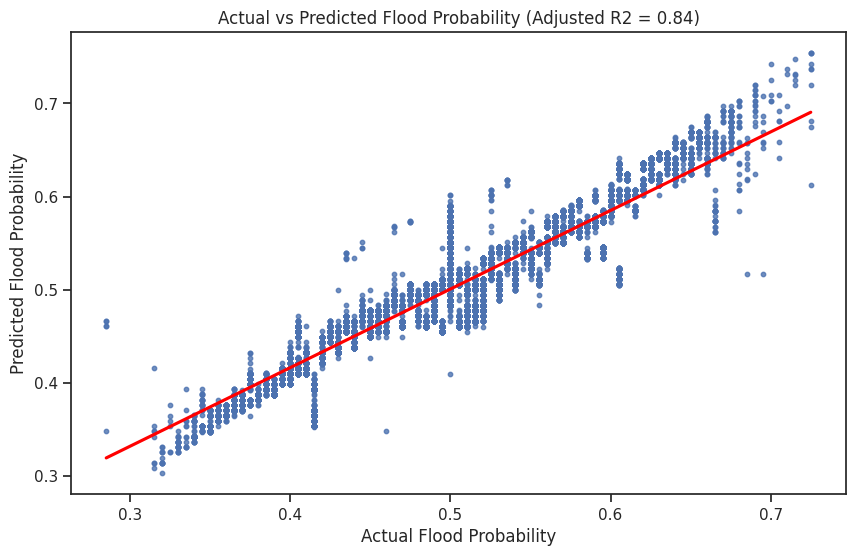

In [41]:
r2 = r2_score(y_val, y_pred)
# Number of observations and predictors
n = X_val_sc.shape[0]
p = X_val_sc.shape[1]

# Calculate the adjusted R^2 value
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Plot the scatter plot with the line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=y_val, y=y_pred, ci=None, scatter_kws={"s": 10}, line_kws={"color": "red"})

# Add labels and title
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.title(f'Actual vs Predicted Flood Probability (Adjusted R2 = {adj_r2:.2f})')

# Show the plot
plt.show()

In [42]:
test_df= pd.read_csv('/content/drive/MyDrive/test.csv', header=0)
print(test_df.shape)
print(test_df.columns)
print(test_df.dtypes)

(745305, 21)
Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')
id                                 int64
MonsoonIntensity                   int64
TopographyDrainage                 int64
RiverManagement                    int64
Deforestation                      int64
Urbanization                       int64
ClimateChange                      int64
DamsQuality                        int64
Siltation                          int64
AgriculturalPractices              int64
Encroachments                      int64
IneffectiveDisasterPreparedness    int64
DrainageSystems        

In [44]:
X_test= test_df.drop(columns='id', axis=1)
X_test_sc= scaler.fit_transform(X_test)
y_pred_t = lasso_model.predict(X_test_sc)
y_pred_t = pd.Series(y_pred_t, name='PredictedFloodProbability')

# Add the predictions as a new column to test_df
test_df['PredictedFloodProbability'] = y_pred_t
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,PredictedFloodProbability
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5,0.573314
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3,0.455273
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3,0.454743
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4,0.466122
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5,0.466154


In [49]:
submission= test_df[['id','PredictedFloodProbability']]
submission.to_csv('submission.csv', index=False)